In [1]:
!pwd


/Users/alex/code/kvkirya/pt-ai/notebooks


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
from collections import namedtuple


In [3]:
import json

with open('/Users/alex/code/kvkirya/pt-ai/raw_data/annotations.json') as json_data:
    data = json.load(json_data)


In [4]:
data["annotations"]


[{'category_id': 0,
  'image_id': 1,
  'id': 1,
  'iscrowd': 0,
  'color': [0.09803921568627451, 0.09803921568627451, 0.4392156862745098],
  'area': 3075.780400000002,
  'segmentation': [[493.0,
    240.99,
    485.01,
    236.0,
    484.0,
    227.99,
    479.99,
    232.0,
    479.99,
    234.0,
    483.99,
    238.0,
    482.0,
    240.99,
    477.0,
    239.99,
    474.01,
    237.0,
    473.0,
    232.99,
    468.0,
    233.99,
    463.0,
    231.99,
    458.01,
    226.0,
    454.01,
    215.0,
    441.01,
    203.0,
    439.01,
    199.0,
    445.0,
    194.01,
    462.0,
    187.01,
    481.0,
    194.01,
    483.99,
    197.0,
    483.99,
    200.0,
    478.99,
    206.0,
    482.0,
    209.01,
    485.0,
    206.01,
    489.0,
    206.01,
    491.99,
    209.0,
    492.99,
    215.0,
    489.99,
    231.0,
    491.99,
    235.0,
    495.99,
    238.0,
    493.0,
    240.99]],
  'bbox': [439.01, 187.01, 56.98000000000002, 53.98000000000002],
  'num_keypoints': 14,
  'keypoints

In [5]:
df_images = pd.DataFrame(data["images"])
df_annotations = pd.DataFrame(data["annotations"])


In [6]:
df_annotations.drop(columns = "id", axis = 0, inplace = True)
df_annotations.rename(columns = {"image_id" : "id"}, inplace = True)
len(df_annotations)


167944

In [7]:
#dataset with every single different character in it
df_complete = pd.merge(df_annotations, df_images, on = "id")
df_complete = df_complete[['id', 'file_name', 'pose_variation',
       'pose_category', 'exercise_category', 'bbox', "camera_rotation_deg"]]
df_complete


id         file_name   pose_variation pose_category  \
0           1  00000001.rgb.png            situp         situp   
1           1  00000001.rgb.png            situp         situp   
2           1  00000001.rgb.png       tree_right          tree   
3           2  00000002.rgb.png  sideplank_right     sideplank   
4           2  00000002.rgb.png      curls_right         curls   
...       ...               ...              ...           ...   
167939  59577  00059577.rgb.png        hipbridge     hipbridge   
167940  59578  00059578.rgb.png            plank         plank   
167941  59578  00059578.rgb.png         legraise      legraise   
167942  59578  00059578.rgb.png        hipbridge     hipbridge   
167943  59578  00059578.rgb.png   sideplank_left     sideplank   

       exercise_category                                               bbox  \
0                 [HIIT]  [439.01, 187.01, 56.98000000000002, 53.9800000...   
1                 [HIIT]  [142.01, 185.01, 51.98000000000002, 54.9800000...   
2                 [Yoga]  [302.01, 97.01, 38.98000000000002, 161.9800000...   
3           [Yoga, HIIT]        [477.01, 113.01, 110.98000000000002, 91.98]   
4                 [HIIT]  [506.01, 99.01, 97.98000000000002, 239.9800000...   
...                  ...                                                ...   
167939      [Yoga, HIIT]  [398.01, 229.01, 126.98000000000002, 67.980000...   
167940      [Yoga, HIIT]  [249.01, 222.01, 245.98000000000002, 132.98000...   
167941            [HIIT]  [290.01, 137.01, 71.98000000000002, 73.9800000...   
167942      [Yoga, HIIT]  [297.01, 201.01, 106.98000000000002, 48.980000...   
167943      [Yoga, HIIT]  [188.01, 151.01, 89.98000000000002, 85.9800000...   

        camera_rotation_deg  
0                 78.472965  
1                 78.472965  
2                 78.472965  
3                 67.888454  
4                 67.888454  
...                     ...  
167939            70.161267  
167940            78.559729  
167941            78.559729  
167942            78.559729  
167943            78.559729  

[167944 rows x 7 columns]

In [8]:
df_complete["bbox"][0]


[439.01, 187.01, 56.98000000000002, 53.98000000000002]

In [9]:
df_complete


id         file_name   pose_variation pose_category  \
0           1  00000001.rgb.png            situp         situp   
1           1  00000001.rgb.png            situp         situp   
2           1  00000001.rgb.png       tree_right          tree   
3           2  00000002.rgb.png  sideplank_right     sideplank   
4           2  00000002.rgb.png      curls_right         curls   
...       ...               ...              ...           ...   
167939  59577  00059577.rgb.png        hipbridge     hipbridge   
167940  59578  00059578.rgb.png            plank         plank   
167941  59578  00059578.rgb.png         legraise      legraise   
167942  59578  00059578.rgb.png        hipbridge     hipbridge   
167943  59578  00059578.rgb.png   sideplank_left     sideplank   

       exercise_category                                               bbox  \
0                 [HIIT]  [439.01, 187.01, 56.98000000000002, 53.9800000...   
1                 [HIIT]  [142.01, 185.01, 51.98000000000002, 54.9800000...   
2                 [Yoga]  [302.01, 97.01, 38.98000000000002, 161.9800000...   
3           [Yoga, HIIT]        [477.01, 113.01, 110.98000000000002, 91.98]   
4                 [HIIT]  [506.01, 99.01, 97.98000000000002, 239.9800000...   
...                  ...                                                ...   
167939      [Yoga, HIIT]  [398.01, 229.01, 126.98000000000002, 67.980000...   
167940      [Yoga, HIIT]  [249.01, 222.01, 245.98000000000002, 132.98000...   
167941            [HIIT]  [290.01, 137.01, 71.98000000000002, 73.9800000...   
167942      [Yoga, HIIT]  [297.01, 201.01, 106.98000000000002, 48.980000...   
167943      [Yoga, HIIT]  [188.01, 151.01, 89.98000000000002, 85.9800000...   

        camera_rotation_deg  
0                 78.472965  
1                 78.472965  
2                 78.472965  
3                 67.888454  
4                 67.888454  
...                     ...  
167939            70.161267  
167940            78.559729  
167941            78.559729  
167942            78.559729  
167943            78.559729  

[167944 rows x 7 columns]

# OUR FUNCTION TO CALCULATE IOU

In [10]:
df_complete


id         file_name   pose_variation pose_category  \
0           1  00000001.rgb.png            situp         situp   
1           1  00000001.rgb.png            situp         situp   
2           1  00000001.rgb.png       tree_right          tree   
3           2  00000002.rgb.png  sideplank_right     sideplank   
4           2  00000002.rgb.png      curls_right         curls   
...       ...               ...              ...           ...   
167939  59577  00059577.rgb.png        hipbridge     hipbridge   
167940  59578  00059578.rgb.png            plank         plank   
167941  59578  00059578.rgb.png         legraise      legraise   
167942  59578  00059578.rgb.png        hipbridge     hipbridge   
167943  59578  00059578.rgb.png   sideplank_left     sideplank   

       exercise_category                                               bbox  \
0                 [HIIT]  [439.01, 187.01, 56.98000000000002, 53.9800000...   
1                 [HIIT]  [142.01, 185.01, 51.98000000000002, 54.9800000...   
2                 [Yoga]  [302.01, 97.01, 38.98000000000002, 161.9800000...   
3           [Yoga, HIIT]        [477.01, 113.01, 110.98000000000002, 91.98]   
4                 [HIIT]  [506.01, 99.01, 97.98000000000002, 239.9800000...   
...                  ...                                                ...   
167939      [Yoga, HIIT]  [398.01, 229.01, 126.98000000000002, 67.980000...   
167940      [Yoga, HIIT]  [249.01, 222.01, 245.98000000000002, 132.98000...   
167941            [HIIT]  [290.01, 137.01, 71.98000000000002, 73.9800000...   
167942      [Yoga, HIIT]  [297.01, 201.01, 106.98000000000002, 48.980000...   
167943      [Yoga, HIIT]  [188.01, 151.01, 89.98000000000002, 85.9800000...   

        camera_rotation_deg  
0                 78.472965  
1                 78.472965  
2                 78.472965  
3                 67.888454  
4                 67.888454  
...                     ...  
167939            70.161267  
167940            78.559729  
167941            78.559729  
167942            78.559729  
167943            78.559729  

[167944 rows x 7 columns]

# THIS FUNCTION IS WRONG REPLACE IT, GET_IOU)

In [11]:
#let me try create a different iou calculator
#where bbox1 and bbox2 are in pascal format, so [x1, y1, x2, y2]
#the all in one function!!!!
#the function takes in two rectangles and outputs the percentage iou
#bbox is in format [xmin, ymin, width, height]
def get_iou(box1, box2):

    """Function to generate the IoU for two bounding boxes in COCO format

    box1: list of floats representing bounding box (COCO format)
    box2: list of floats representing bounding box (COCO format)
    """

    # Convert from COCO format to corner format, this makes it simpler to calculate IoU
    box1 = [box1[0], box1[1], box1[0] + box1[2], box1[1] + box1[3]]
    box2 = [box2[0], box2[1], box2[0] + box2[2], box2[1] + box2[3]]

    # Calculate intersection coordinates
    x_left = max(box1[0], box2[0])
    y_top = max(box1[1], box2[1])
    x_right = min(box1[2], box2[2])
    y_bottom = min(box1[3], box2[3])

    # Check if there is no overlap
    if x_right < x_left or y_bottom < y_top:
        return 0.0

    # Calculate intersection area
    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    # Calculate union area
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area

    return iou


In [12]:
#what if two thigns are equal
#so that works too!!
get_iou([439.01, 187.01, 495.99, 240.99], [439.01, 187.01, 495.99, 240.99])


1.0

In [13]:
#now we need to use the same type of frame work as before but a bit more complicated
#lets say there is only one person in the image, its gonna return 1, because its compared to itself!
#so firstly we need to return 0, or add 0 to the list when these are with images that only have 1 person in them


# DONT REPLACE THIS ITS RIGHT

In [14]:
#well use the same framework
#we enter each per_id into this one still
def iou_calculator(X):
    #this function is for each group of ids
    #we are creating an empty list, called bbox_list
    bbox_list = []
    #we are going to iterate through each row of our small group of id = 1 for example
    for index, row in X.iterrows():
        #we add all the bbox_pascals to the bbox_list
        bbox_list.append(np.array(row['bbox']))


    #we are creating an empty list called overlap_list
    iou_list = []

    #so for the length of bbox_list, we are going to iterate through each bbox of the list, (i)
    for i in range(len(bbox_list)):
        #create a new list, so we are going to have a list for each bbox in the bbox_list
        new_list = []

        #if there's only one person in the image
        if len(bbox_list) == 1:
            #we say theres 0 intersections, so we add a list of 0
            new_list.append(0)

        #for each bbox of the list, we are going to iterate through all the other bbox's including the one it is
        for j in range(len(bbox_list)):
            #when it's not being compared with itself we append the iou, between the two to the list
            new_list.append(get_iou(bbox_list[i], bbox_list[j]))

        #so then for each bbox, we are going to append the list for each bbox
        #so overlap_list is just going to be a list of lists of comparison for EACH bbox
        #in the form [[true, false, false, false], [true, true, false, false],etcetc]
        iou_list.append(new_list)

    #we want to have a final list... with only one thing for each bbox so wether it overlaps or not
    iou_list_final = []

    #so if any of the items in the list is true we want the value for that bound box to be true
    #if there all false its false
    for lst in iou_list:
        #if the length of this list is one, we do this
        #we add the number to our final list...
        if len(iou_list) == 1:
            iou_list_final.append(0)
        #if there all false, we append false to the list
        else:
            #cuz it will always compare each thing w itself, we remove the max one which will always be 1...
            lst.remove(max(lst))
            #and then append the second max one fo our final iou list
            iou_list_final.append(max(lst))

    return iou_list_final



#    print(iou_list_final)
    #what this last part does is it just append the values in the list, True etc, to the correct part of the dataframe
#    for i in range(len(per_image.index)):
#            df_complete["iou_values"][per_image.index[i]] = iou_list_final[i]


In [15]:
#lets see if it works for a per_image with only one thing inside
#so like 99 for example
per_image = df_complete[df_complete["id"]==54]


In [16]:
iou_calculator(per_image)


[0.0, 0.030887193664147928, 0.030887193664147928]

In [17]:
#so it also works with only one thing
#so now let's try implement it on the whole dataframe...


In [18]:
id_list = list(set(df_complete["id"].to_list()))


In [19]:
#exactly like before
#we are going to iterate through this list of image ids
#this takes time wallahi

iou_list_ultimate = []
for i in id_list:
    #each group with one image id is a per id
    #for each per_id we are going to do the overlap_check which also includes, basically adding to df
    per_id = df_complete[df_complete["id"] == i]
    iou_list_ultimate.append(iou_calculator(per_id))


In [20]:
#is the ultimate list
iou_list_ultimate


[[0.0, 0.0, 0.0],
 [0.2880187239279877, 0.2880187239279877, 0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0],
 [0.0, 0.0],
 [0],
 [0.0, 0.0, 0.031074814866080762, 0.031074814866080762],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0],
 [0.0, 0.0],
 [0],
 [0],
 [0.0, 0.0],
 [0.010186988090501108, 0.0, 0.010186988090501108],
 [0.0,
  0.00163887312251875,
  0.015475172601512516,
  0.015475172601512516,
  0.00163887312251875],
 [0.12327493428086747,
  0.05077466423092531,
  0.12327493428086747,
  0.05077466423092531,
  0.0],
 [0.0, 0.08999557810014619, 0.0, 0.08999557810014619],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.029672510149480583, 0.04345295369812785, 0.04345295369812785],
 [0],
 [0],
 [0.0, 0.0, 0.0, 0.0],
 [0],
 [0],
 [0.0, 0.0, 0.0, 0.0],
 [0],
 [0],
 [0],
 [0],
 [0.0, 0.1023186989068192, 0.1023186989068192, 0.0],
 [0.0, 0.0],
 [0],
 [0.0, 0.0, 0.0],
 [0.03464200037660797, 0.03464200037660797],
 [0.10736689249430098, 0.10736689249430098, 0.0],
 [0.0, 0.0, 0.0],
 [0.168411289899

In [21]:
flat_list = []
for sublist in iou_list_ultimate:
    for item in sublist:
        flat_list.append(item)


In [22]:
my_list = pd.DataFrame(flat_list)


In [23]:
my_list


0
0       0.000000
1       0.000000
2       0.000000
3       0.288019
4       0.288019
...          ...
167939  0.000000
167940  0.085628
167941  0.065396
167942  0.085628
167943  0.010850

[167944 rows x 1 columns]

In [24]:
df_completed = pd.merge(df_complete, my_list, left_index=True, right_index=True)
df_completed


id         file_name   pose_variation pose_category  \
0           1  00000001.rgb.png            situp         situp   
1           1  00000001.rgb.png            situp         situp   
2           1  00000001.rgb.png       tree_right          tree   
3           2  00000002.rgb.png  sideplank_right     sideplank   
4           2  00000002.rgb.png      curls_right         curls   
...       ...               ...              ...           ...   
167939  59577  00059577.rgb.png        hipbridge     hipbridge   
167940  59578  00059578.rgb.png            plank         plank   
167941  59578  00059578.rgb.png         legraise      legraise   
167942  59578  00059578.rgb.png        hipbridge     hipbridge   
167943  59578  00059578.rgb.png   sideplank_left     sideplank   

       exercise_category                                               bbox  \
0                 [HIIT]  [439.01, 187.01, 56.98000000000002, 53.9800000...   
1                 [HIIT]  [142.01, 185.01, 51.98000000000002, 54.9800000...   
2                 [Yoga]  [302.01, 97.01, 38.98000000000002, 161.9800000...   
3           [Yoga, HIIT]        [477.01, 113.01, 110.98000000000002, 91.98]   
4                 [HIIT]  [506.01, 99.01, 97.98000000000002, 239.9800000...   
...                  ...                                                ...   
167939      [Yoga, HIIT]  [398.01, 229.01, 126.98000000000002, 67.980000...   
167940      [Yoga, HIIT]  [249.01, 222.01, 245.98000000000002, 132.98000...   
167941            [HIIT]  [290.01, 137.01, 71.98000000000002, 73.9800000...   
167942      [Yoga, HIIT]  [297.01, 201.01, 106.98000000000002, 48.980000...   
167943      [Yoga, HIIT]  [188.01, 151.01, 89.98000000000002, 85.9800000...   

        camera_rotation_deg         0  
0                 78.472965  0.000000  
1                 78.472965  0.000000  
2                 78.472965  0.000000  
3                 67.888454  0.288019  
4                 67.888454  0.288019  
...                     ...       ...  
167939            70.161267  0.000000  
167940            78.559729  0.085628  
167941            78.559729  0.065396  
167942            78.559729  0.085628  
167943            78.559729  0.010850  

[167944 rows x 8 columns]

In [25]:
df_complete_filtered = df_completed[(df_complete["pose_variation"] == "squats") |
                                    (df_complete["pose_variation"] == "pushups") |
                                    (df_complete["pose_variation"] == "lunge_left") |
                                    (df_complete["pose_variation"] == "lunge_right")]

df_complete_filtered


id         file_name pose_variation pose_category  \
7           3  00000003.rgb.png         squats        squats   
10          4  00000004.rgb.png        pushups       pushups   
18          8  00000008.rgb.png         squats        squats   
25         10  00000010.rgb.png        pushups       pushups   
26         10  00000010.rgb.png         squats        squats   
...       ...               ...            ...           ...   
167923  59572  00059572.rgb.png     lunge_left         lunge   
167928  59573  00059573.rgb.png        pushups       pushups   
167929  59574  00059574.rgb.png        pushups       pushups   
167932  59575  00059575.rgb.png         squats        squats   
167936  59577  00059577.rgb.png    lunge_right         lunge   

       exercise_category                                               bbox  \
7           [Yoga, HIIT]          [237.01, 96.01, 34.98000000000002, 90.98]   
10                [HIIT]  [0, 246.01, 146.98000000000002, 71.98000000000...   
18          [Yoga, HIIT]  [300.01, 160.01, 32.98000000000002, 80.9800000...   
25                [HIIT]  [127.00999999999999, 254.01, 166.9800000000000...   
26          [Yoga, HIIT]  [332.01, 86.01, 69.98000000000002, 139.9800000...   
...                  ...                                                ...   
167923      [Yoga, HIIT]  [189.01, 90.01, 102.98000000000002, 132.980000...   
167928            [HIIT]  [413.01, 308.01, 226.98000000000002, 152.98000...   
167929            [HIIT]  [166.01, 209.01, 176.98000000000002, 100.98000...   
167932      [Yoga, HIIT]  [170.01, 33.01, 72.98000000000002, 166.9800000...   
167936      [Yoga, HIIT]        [247.01, 116.01, 91.98000000000002, 126.98]   

        camera_rotation_deg    0  
7                 73.478342  0.0  
10                72.287580  0.0  
18                80.801787  0.0  
25                68.929825  0.0  
26                68.929825  0.0  
...                     ...  ...  
167923            67.193017  0.0  
167928            75.490290  0.0  
167929            70.070446  0.0  
167932            63.659398  0.0  
167936            70.161267  0.0  

[33853 rows x 8 columns]

In [26]:
df_complete_final = df_complete_filtered[df_complete_filtered[0] < 0.09]


In [27]:
df_complete_final["original_file_name"] = df_complete_final["file_name"]
df_complete_final


/var/folders/tg/flm_35zx19lf88qt_s9b4x1c0000gn/T/ipykernel_5625/1683410351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete_final["original_file_name"] = df_complete_final["file_name"]


id         file_name pose_variation pose_category  \
7           3  00000003.rgb.png         squats        squats   
10          4  00000004.rgb.png        pushups       pushups   
18          8  00000008.rgb.png         squats        squats   
25         10  00000010.rgb.png        pushups       pushups   
26         10  00000010.rgb.png         squats        squats   
...       ...               ...            ...           ...   
167923  59572  00059572.rgb.png     lunge_left         lunge   
167928  59573  00059573.rgb.png        pushups       pushups   
167929  59574  00059574.rgb.png        pushups       pushups   
167932  59575  00059575.rgb.png         squats        squats   
167936  59577  00059577.rgb.png    lunge_right         lunge   

       exercise_category                                               bbox  \
7           [Yoga, HIIT]          [237.01, 96.01, 34.98000000000002, 90.98]   
10                [HIIT]  [0, 246.01, 146.98000000000002, 71.98000000000...   
18          [Yoga, HIIT]  [300.01, 160.01, 32.98000000000002, 80.9800000...   
25                [HIIT]  [127.00999999999999, 254.01, 166.9800000000000...   
26          [Yoga, HIIT]  [332.01, 86.01, 69.98000000000002, 139.9800000...   
...                  ...                                                ...   
167923      [Yoga, HIIT]  [189.01, 90.01, 102.98000000000002, 132.980000...   
167928            [HIIT]  [413.01, 308.01, 226.98000000000002, 152.98000...   
167929            [HIIT]  [166.01, 209.01, 176.98000000000002, 100.98000...   
167932      [Yoga, HIIT]  [170.01, 33.01, 72.98000000000002, 166.9800000...   
167936      [Yoga, HIIT]        [247.01, 116.01, 91.98000000000002, 126.98]   

        camera_rotation_deg    0 original_file_name  
7                 73.478342  0.0   00000003.rgb.png  
10                72.287580  0.0   00000004.rgb.png  
18                80.801787  0.0   00000008.rgb.png  
25                68.929825  0.0   00000010.rgb.png  
26                68.929825  0.0   00000010.rgb.png  
...                     ...  ...                ...  
167923            67.193017  0.0   00059572.rgb.png  
167928            75.490290  0.0   00059573.rgb.png  
167929            70.070446  0.0   00059574.rgb.png  
167932            63.659398  0.0   00059575.rgb.png  
167936            70.161267  0.0   00059577.rgb.png  

[29880 rows x 9 columns]

In [132]:
df_complete = df_complete_final


In [133]:
# FILTER IMAGES BEFORE CROPPING
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image


In [134]:
#HERE


# HERE FOR 00

In [135]:
def crop_image(file_name, bbox, index, iou, pose_variation):
    #change here
    image = plt.imread(f'/Users/alex/code/kvkirya/pt-ai/raw_data/images_to_crop_01/{file_name}')
    x0 = int(bbox[0])
    y0 = int(bbox[1])
    width = int(bbox[2])
    height = int(bbox[3])
    wanted_boundaries_array = image[y0:y0+height , x0:x0+width, :]
    im_crop = plt.imshow(image[y0:y0+height , x0:x0+width, :])
    plt.axis("off")
    plt.tight_layout()
    #copied_im = im_crop.copy()
    plt.savefig(f'/Users/alex/code/kvkirya/pt-ai/raw_data/cropped_data_01/{file_name}_{index}_{iou}_{pose_variation}_cropped.png', bbox_inches="tight", pad_inches=0)

    return str(file_name) + "_" + str(index) + "_cropped"


In [140]:
extension_mask = df_complete.file_name.str.endswith(".rgb.png")

df_complete[extension_mask]
#you guys have to change this
df_complete = df_complete[(df_complete["id"] > 10686) & (df_complete["id"] < 20001) ]


In [141]:
df_complete


id         file_name pose_variation pose_category exercise_category  \
30296  10690  00010690.rgb.png         squats        squats      [Yoga, HIIT]   
30300  10692  00010692.rgb.png    lunge_right         lunge      [Yoga, HIIT]   
30305  10693  00010693.rgb.png        pushups       pushups            [HIIT]   
30306  10694  00010694.rgb.png         squats        squats      [Yoga, HIIT]   
30317  10697  00010697.rgb.png    lunge_right         lunge      [Yoga, HIIT]   
...      ...               ...            ...           ...               ...   
56416  19982  00019982.rgb.png         squats        squats      [Yoga, HIIT]   
56432  19988  00019988.rgb.png     lunge_left         lunge      [Yoga, HIIT]   
56433  19989  00019989.rgb.png        pushups       pushups            [HIIT]   
56434  19989  00019989.rgb.png        pushups       pushups            [HIIT]   
56439  19991  00019991.rgb.png        pushups       pushups            [HIIT]   

                                                    bbox  camera_rotation_deg  \
30296  [140.01, 158.01, 81.98000000000002, 149.980000...            67.639664   
30300  [135.01, 155.01, 71.98000000000002, 151.980000...            71.562918   
30305  [334.01, 174.01, 134.98000000000002, 48.980000...            69.445450   
30306  [153.01, 121.01, 59.98000000000002, 128.980000...            68.518614   
30317  [291.01, 148.01, 59.98000000000002, 96.9800000...            75.991353   
...                                                  ...                  ...   
56416  [248.01, 129.01, 76.98000000000002, 157.980000...            74.257625   
56432  [195.01, 12.01, 104.98000000000002, 157.980000...            61.728893   
56433        [110.01, 212.01, 116.98, 59.98000000000002]            70.209714   
56434  [384.01, 168.01, 78.98000000000002, 44.9800000...            70.209714   
56439  [400.01, 192.01, 131.98000000000002, 45.980000...            70.711924   

              0 original_file_name  index  
30296  0.000000   00010690.rgb.png    338  
30300  0.074338   00010692.rgb.png    339  
30305  0.000000   00010693.rgb.png    340  
30306  0.000000   00010694.rgb.png    341  
30317  0.000000   00010697.rgb.png    342  
...         ...                ...    ...  
56416  0.040719   00019982.rgb.png   5028  
56432  0.000000   00019988.rgb.png   5029  
56433  0.000000   00019989.rgb.png   5030  
56434  0.069304   00019989.rgb.png   5031  
56439  0.000000   00019991.rgb.png   5032  

[4695 rows x 10 columns]

In [142]:
df_complete["index"] = range(1, len(df_complete)+1)
df_complete


/var/folders/tg/flm_35zx19lf88qt_s9b4x1c0000gn/T/ipykernel_5625/3879004086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete["index"] = range(1, len(df_complete)+1)


id         file_name pose_variation pose_category exercise_category  \
30296  10690  00010690.rgb.png         squats        squats      [Yoga, HIIT]   
30300  10692  00010692.rgb.png    lunge_right         lunge      [Yoga, HIIT]   
30305  10693  00010693.rgb.png        pushups       pushups            [HIIT]   
30306  10694  00010694.rgb.png         squats        squats      [Yoga, HIIT]   
30317  10697  00010697.rgb.png    lunge_right         lunge      [Yoga, HIIT]   
...      ...               ...            ...           ...               ...   
56416  19982  00019982.rgb.png         squats        squats      [Yoga, HIIT]   
56432  19988  00019988.rgb.png     lunge_left         lunge      [Yoga, HIIT]   
56433  19989  00019989.rgb.png        pushups       pushups            [HIIT]   
56434  19989  00019989.rgb.png        pushups       pushups            [HIIT]   
56439  19991  00019991.rgb.png        pushups       pushups            [HIIT]   

                                                    bbox  camera_rotation_deg  \
30296  [140.01, 158.01, 81.98000000000002, 149.980000...            67.639664   
30300  [135.01, 155.01, 71.98000000000002, 151.980000...            71.562918   
30305  [334.01, 174.01, 134.98000000000002, 48.980000...            69.445450   
30306  [153.01, 121.01, 59.98000000000002, 128.980000...            68.518614   
30317  [291.01, 148.01, 59.98000000000002, 96.9800000...            75.991353   
...                                                  ...                  ...   
56416  [248.01, 129.01, 76.98000000000002, 157.980000...            74.257625   
56432  [195.01, 12.01, 104.98000000000002, 157.980000...            61.728893   
56433        [110.01, 212.01, 116.98, 59.98000000000002]            70.209714   
56434  [384.01, 168.01, 78.98000000000002, 44.9800000...            70.209714   
56439  [400.01, 192.01, 131.98000000000002, 45.980000...            70.711924   

              0 original_file_name  index  
30296  0.000000   00010690.rgb.png      1  
30300  0.074338   00010692.rgb.png      2  
30305  0.000000   00010693.rgb.png      3  
30306  0.000000   00010694.rgb.png      4  
30317  0.000000   00010697.rgb.png      5  
...         ...                ...    ...  
56416  0.040719   00019982.rgb.png   4691  
56432  0.000000   00019988.rgb.png   4692  
56433  0.000000   00019989.rgb.png   4693  
56434  0.069304   00019989.rgb.png   4694  
56439  0.000000   00019991.rgb.png   4695  

[4695 rows x 10 columns]

[140.01, 158.01, 81.98000000000002, 149.98000000000002]
[135.01, 155.01, 71.98000000000002, 151.98000000000002]
[334.01, 174.01, 134.98000000000002, 48.98000000000002]
[153.01, 121.01, 59.98000000000002, 128.98000000000002]
[291.01, 148.01, 59.98000000000002, 96.98000000000002]
[285.01, 150.01, 71.98000000000002, 120.98000000000002]
[183.01, 117.01, 42.98000000000002, 87.98]
[350.01, 179.01, 61.98000000000002, 44.98000000000002]
[293.01, 150.01, 42.98000000000002, 93.98000000000002]
[185.01, 125.01, 46.98000000000002, 88.98]
[224.01, 260.01, 202.98000000000002, 75.98000000000002]
[398.01, 117.01, 63.98000000000002, 144.98000000000002]
[129.01, 168.01, 115.98000000000002, 214.98000000000002]
[135.01, 184.01, 85.98000000000002, 39.98000000000002]
[244.01, 79.01, 68.98000000000002, 101.98]
[252.01, 85.01, 54.98000000000002, 104.98]
[138.01, 79.01, 38.98000000000002, 95.98]
[377.01, 242.01, 118.98000000000002, 237.98000000000002]
[269.01, 414.01, 288.98, 65.98000000000002]
[83.01, 203.01, 

KeyboardInterrupt: 

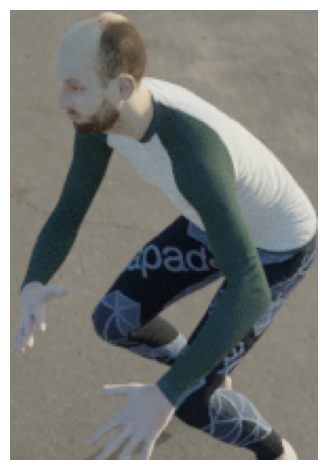

In [143]:
new_cropped_names_list = []
for index, row in df_complete.iterrows():
    bbox_used = row["bbox"]
    file_name_used = row["file_name"]
    index_used = row["index"]
    iou_used = row[0]
    pose_variation_used = row["pose_variation"]
    print(row["bbox"])
    #crop image
    new_cropped_names_list.append(crop_image(file_name_used, bbox_used, index_used, iou_used, pose_variation_used))


In [123]:
# test
source_folder = '../raw_data/cropped_data_00'
import os
import shutil


In [124]:
folder_main = "../raw_data/processed_data_00"
folder_squats = (f'{folder_main}/squats')
folder_pushups = (f'{folder_main}/pushups')
folder_lunge_left = (f'{folder_main}/lunge_left')
folder_lunge_right = (f'{folder_main}/lunge_right')
os.makedirs(folder_main)
os.makedirs(folder_squats)
os.makedirs(folder_pushups)
os.makedirs(folder_lunge_left)
os.makedirs(folder_lunge_right)
print(f"Folder '{folder_main}' made, good job mate.")


Folder '../raw_data/processed_data_00' made, good job mate.


In [125]:
cropped_data_rel_path = '../raw_data/cropped_data_00'
cropped_data_path = os.listdir(cropped_data_rel_path)
cropped_data_path


['00004956.rgb.png_80_0.0_squats_cropped.png',
 '00000064.rgb.png_36_0.05121058153047115_pushups_cropped.png',
 '00009147.rgb.png_137_0.0_pushups_cropped.png',
 '00004096.rgb.png_30_0.0_squats_cropped.png',
 '00005648.rgb.png_97_0.0_pushups_cropped.png',
 '00004960.rgb.png_82_0.0_pushups_cropped.png',
 '00007303.rgb.png_44_0.0_pushups_cropped.png',
 '00008797.rgb.png_280_0.0_lunge_left_cropped.png',
 '00003560.rgb.png_159_0.0_pushups_cropped.png',
 '00002593.rgb.png_100_0.0_lunge_right_cropped.png',
 '00008884.rgb.png_2_0.0_lunge_right_cropped.png',
 '00000534.rgb.png_279_0.0_squats_cropped.png',
 '00000473.rgb.png_244_0.0_pushups_cropped.png',
 '00009104.rgb.png_113_0.0_lunge_right_cropped.png',
 '00002001.rgb.png_151_0.0_squats_cropped.png',
 '00005208.rgb.png_32_0.021309827240643675_lunge_right_cropped.png',
 '00004132.rgb.png_45_0.0_squats_cropped.png',
 '00008013.rgb.png_92_0.0_lunge_left_cropped.png',
 '00004617.rgb.png_95_0.0_squats_cropped.png',
 '00006949.rgb.png_103_0.0340086

In [126]:
pose_variation = None
for file in cropped_data_path:
    if file.endswith('.png'):
        if 'lunge_left' in file:
            destination_path = os.path.join(folder_lunge_left, file)
        elif 'lunge_right' in file:
            destination_path = os.path.join(folder_lunge_right, file)
        elif 'squats' in file:
            destination_path = os.path.join(folder_squats, file)
        elif 'pushups' in file:
            destination_path = os.path.join(folder_pushups, file)
    try:
        shutil.copy2(os.path.join(cropped_data_rel_path, file), destination_path)
        print(f"File '{file}' with pose variation '{pose_variation}' copied to '{folder_main}'")
    except FileNotFoundError:
        print(f"File is not there mate: '{file}'")


File '00004956.rgb.png_80_0.0_squats_cropped.png' with pose variation 'None' copied to '../raw_data/processed_data_00'
File '00000064.rgb.png_36_0.05121058153047115_pushups_cropped.png' with pose variation 'None' copied to '../raw_data/processed_data_00'
File '00009147.rgb.png_137_0.0_pushups_cropped.png' with pose variation 'None' copied to '../raw_data/processed_data_00'
File '00004096.rgb.png_30_0.0_squats_cropped.png' with pose variation 'None' copied to '../raw_data/processed_data_00'
File '00005648.rgb.png_97_0.0_pushups_cropped.png' with pose variation 'None' copied to '../raw_data/processed_data_00'
File '00004960.rgb.png_82_0.0_pushups_cropped.png' with pose variation 'None' copied to '../raw_data/processed_data_00'
File '00007303.rgb.png_44_0.0_pushups_cropped.png' with pose variation 'None' copied to '../raw_data/processed_data_00'
File '00008797.rgb.png_280_0.0_lunge_left_cropped.png' with pose variation 'None' copied to '../raw_data/processed_data_00'
File '00003560.rgb.pn